<a href="https://colab.research.google.com/github/newcooldiscoveries/Algorithms-DNA-Sequencing/blob/master/Class_Worksheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2021-09-11 19:30:14--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.32.84.71, 13.32.84.231, 13.32.84.169, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.32.84.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq.2’

ERR037900_1.first10 100%[===================>] 235.96K  --.-KB/s    in 0.06s   

2021-09-11 19:30:15 (3.99 MB/s) - ‘ERR037900_1.first1000.fastq.2’ saved [241626/241626]



In [32]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, quals = readFastq('ERR037900_1.first1000.fastq')


In [33]:
def phred33ToQ(qual):
    return ord(qual) - 33

In [34]:
def createHist(qualities):
    # Create a histogram of quality scores
    hist = [0]*50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(quals)
print(h)

[0, 0, 17723, 0, 2, 11, 11, 28, 23, 55, 100, 111, 86, 174, 185, 272, 317, 259, 390, 1523, 2782, 762, 286, 413, 403, 538, 351, 694, 971, 777, 1024, 1449, 1341, 1312, 1916, 2233, 3025, 4043, 6640, 45696, 2074, 0, 0, 0, 0, 0, 0, 0, 0, 0]


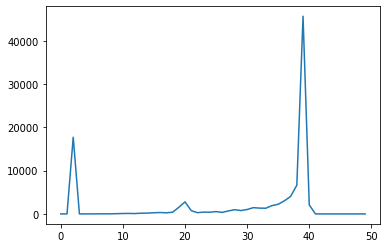

In [35]:
# Plot the histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(h)), h)
plt.show()

[39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40, 39, 36, 39, 38, 39, 37, 39, 39, 28, 2, 28, 29, 29, 37, 37, 37, 37, 33, 40, 40, 39, 38, 36, 39, 36, 36, 38, 38, 36, 39, 29, 39, 38, 30, 25, 35, 30, 35, 33, 35, 37, 37, 33]


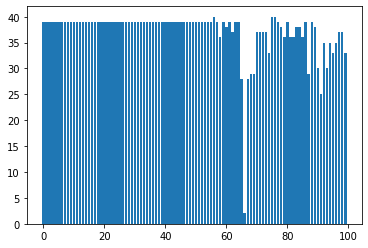

66


In [37]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open (filename) as fh:
        while True:
            fh.readline()
            seq = fh.readline().rstrip()
            fh.readline()
            qual = fh.readline().rstrip()
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities


def createHist(qualities):
    sequences, qualities = readFastq('ERR037900_1.first1000.fastq')
    phredscore = []
    qualities = qualities[-5]
    for phred in qualities:
        q = ord(phred)-33
        phredscore.append(q)
    return phredscore
h = createHist('qualities')
print (h)
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()
min_h = min(h)
index_min_h = h.index(min_h)
print (index_min_h)

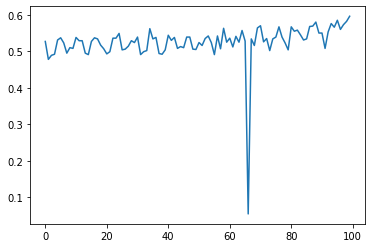

In [28]:
def findGCByPos(reads):
    ''' Find the GC ratio at each position in the read '''
    # Keep track of the number of G/C bases and the total number of bases at each position
    gc = [0] * 100
    totals = [0] * 100
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
    # Divide G/C counts by total counts to get the average at each position
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
    return gc

gc = findGCByPos(seqs)
plt.plot(range(len(gc)), gc)
plt.show()

In [29]:
import collections
count = collections.Counter()
for seq in seqs:
    count.update(seq)
count

Counter({'A': 24057, 'C': 29665, 'G': 22888, 'N': 914, 'T': 22476})

In [30]:
print('offset of leftmost occurrence: %d' % min(gc))

offset of leftmost occurrence: 0


In [23]:
def createHist(sequences):
    # Create a histogram of quality scores
    hist = [0]*50
    for seq in sequences:
        for s in seq:
            q = numSeq('sequences')
            hist[q] += 1
    return hist
h = createHist(sequences)
print(h)

TypeError: ignored

In [12]:
def createHist(seqs):
    # Create a histogram of quality scores
    hist = [0]*50
    for seq in seqs:
        for phred in seqs:
            q = numSeq(phred)
            hist[q] += 1
    return hist
h = createHist(seqs)
print(h)

TypeError: ignored

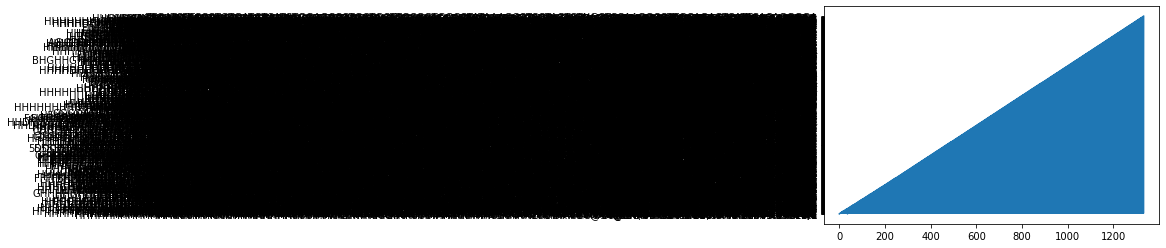

In [7]:
# Plot the histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(seqs)), seqs)
plt.show()

In [4]:
def findGCByPos(reads):
    ''' Find the GC ratio at each position in the read '''
    # Keep track of the number of G/C bases and the total number of bases at each position
    gc = [0] * 100
    totals = [0] * 100
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
    # Divide G/C counts by total counts to get the average at each position
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
    return gc

gc = findGCByPos(seqs)
plt.plot(range(len(gc)), gc)
plt.show()

NameError: ignored